In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

### Prepare data

In [139]:
# read in anonymized data
overlap_geo = pd.read_csv('./frequncy_all.csv')
clippper_geo = pd.read_csv('./frequncy_clipper.csv')
fastrak_geo = pd.read_csv('./frequncy_fastrak.csv')
fastrak2 = pd.read_csv('./anonym_fastrak.csv')
clipper2 = pd.read_csv('./anonym_clipper.csv')
relationship = pd.read_csv('./matched_ids.csv')

In [120]:
# get only columns we want
fastrak = fastrak2[['city', 'state','zip','Record_id_f']]
clipper = clipper2[['city', 'state','zip','Record_id_c']]
relationship = relationship[['Record_id_f', 'Record_id_c']]

In [121]:
fastrak.shape, clipper.shape

((2183229, 4), (2001296, 4))

In [122]:
# merging fastrka/clipper to get the same id
fastrak_joined = fastrak.merge(relationship, on='Record_id_f', how='right')
clipper_joined = clipper.merge(relationship, on='Record_id_c', how='right')

In [123]:
fastrak_joined.shape, clipper_joined.shape

((394782, 5), (394782, 5))

##### Out of 2,183,229 unique accounts on FasTrak and 2,001,296 unique accounts on Clipper, there are 394,782 matched accounts.

In [124]:
fastrak_joined.head(3)

,city,state,zip,Record_id_f,Record_id_c
0,tiburon,ca,94920,959252,131088
1,new bern,nc,28561,1960178,1753593
2,daly city,ca,94015,1693587,1008832


In [125]:
clipper_joined.head(3)

,city,state,zip,Record_id_c,Record_id_f
0,pinole,ca,94564,968685,907495
1,greenbrae,ca,94904,144930,2007719
2,san rafael,ca,94903,651752,433426


### Analysis by City

In [126]:
# number of unique cities on merged
print "There are {} unique cities in the overlapped dataset".format(len(fastrak_joined.city.unique()))

There are 3452 unique cities in the overlapped dataset


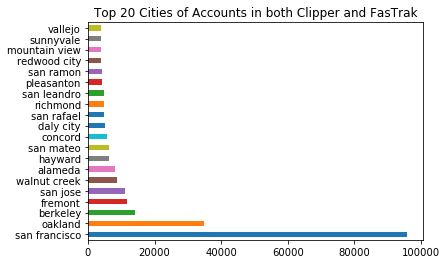

In [127]:
#top 20 cities in overlap
fastrak_joined.city.value_counts()[:20].plot.barh()
plt.title("Top 20 Cities of Accounts in both Clipper and FasTrak")

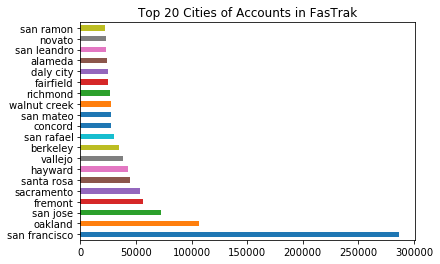

In [128]:
#top 20 cities in fastrak
fastrak.city.value_counts()[:20].plot.barh()
plt.title("Top 20 Cities of Accounts in FasTrak")

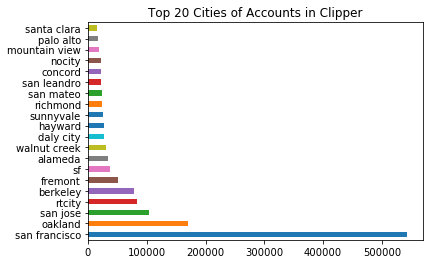

In [129]:
#top 20 cities in clipper
clipper.city.value_counts()[:20].plot.barh()
plt.title("Top 20 Cities of Accounts in Clipper")

The concentration of cities for people who have only Fastrak accounts vary much more than those who have only Clipper accounts-- which are heavily concentrated in San Francisco. 

### Analysis by Zip

In [184]:
#only consider zips with more than 50 customers
overlap_geo = overlap_geo[overlap_geo.frequency > 50]
clippper_geo = clippper_geo[clippper_geo.frequency_x > 50]
fastrak_geo = fastrak_geo[fastrak_geo.frequency_x > 50]

#### Plot of Overlap

In [176]:
# Extract the data we're interested in
lat = overlap_geo['INTPTLAT'].values
lon = overlap_geo['INTPTLONG'].values
population = overlap_geo['percent'].values
area = overlap_geo['frequency'].values/20

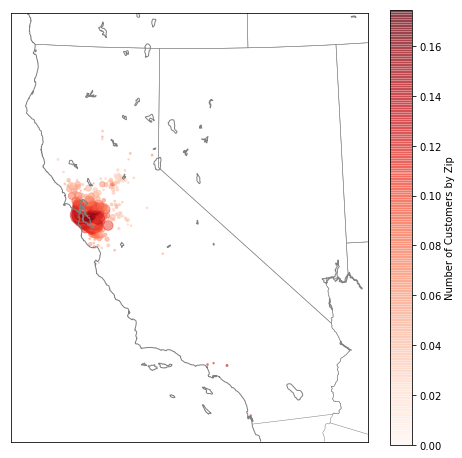

In [177]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
#m.drawlsmask()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=population, s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Number of Customers by Zip')
plt.clim(0, 0.174550)


The concentration of those who own both FasTrak and Clipper is located heavily around the bay area, with a few in major cities. Note this data is filtered for only zip codes that had more than 50 customers in the zip. 

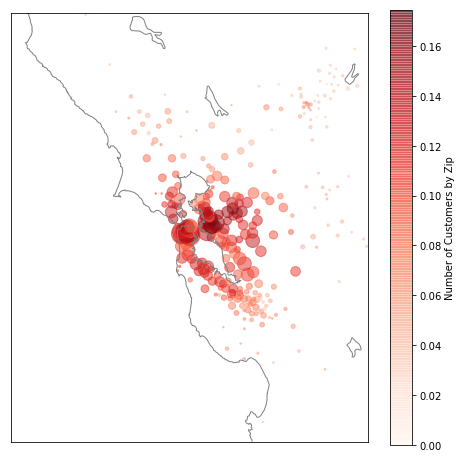

In [178]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.8, lon_0=-122.4194,
            width=100000*2.5, height=120000*2.5)
#m.drawlsmask()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=population, s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Number of Customers by Zip')
plt.clim(0, 0.174550)

#### Plot of Clipper Users

In [179]:
# Extract the data we're interested in
lat = clippper_geo['INTPTLAT'].values
lon = clippper_geo['INTPTLONG'].values
population = clippper_geo['percent'].values
area = clippper_geo['frequency_x'].values/20

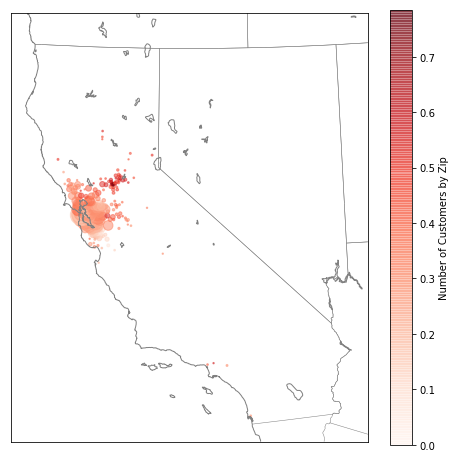

In [180]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
#m.drawlsmask()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=population, s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Number of Customers by Zip')
plt.clim(0, 0.784483)

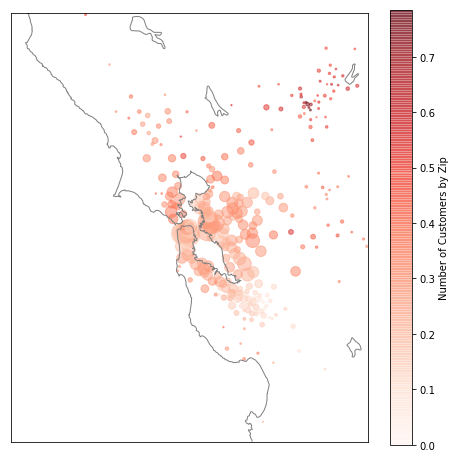

In [181]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.8, lon_0=-122.4194,
            width=100000*2.5, height=120000*2.5)
#m.drawlsmask()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=population, s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Number of Customers by Zip')
plt.clim(0, 0.784483)

#### Plot of FasTrak Users

In [183]:
# Extract the data we're interested in
lat = fastrak_geo['INTPTLAT'].values
lon = fastrak_geo['INTPTLONG'].values
population = fastrak_geo['percent'].values
area = fastrak_geo['frequency_x'].values/20

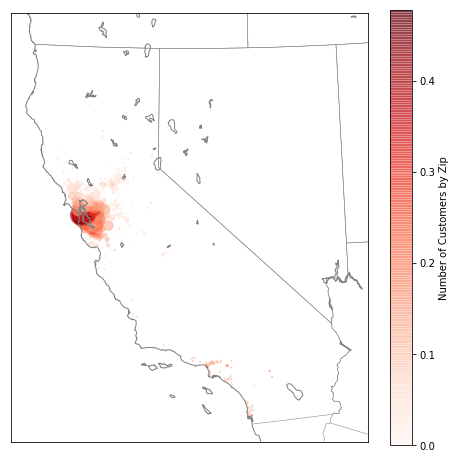

In [186]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
#m.drawlsmask()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=population, s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Number of Customers by Zip')
plt.clim(0, 0.477591)
plt.title('Count of Users with a FasTrak Account ')

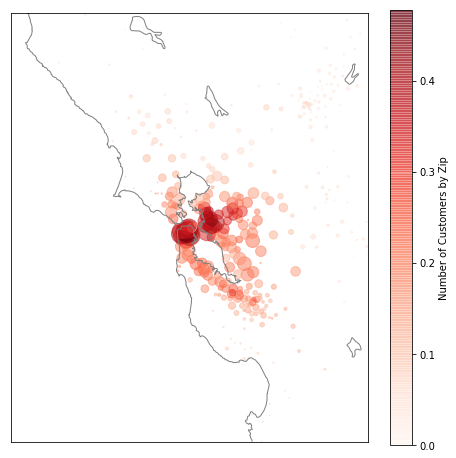

In [187]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.8, lon_0=-122.4194,
            width=100000*2.5, height=120000*2.5)
#m.drawlsmask()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=population, s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Number of Customers by Zip')
plt.clim(0, 0.477591)